# `set_map_boundary`

This notebook is a simple example of the GeoCAT-viz function <a href="../user_api/generated/geocat.viz.util.set_map_boundary.html#geocat-viz.util.set_map_boundary">set_map_boundary</a>.

In [3]:
# Import packages:

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmaps

import geocat.datafiles as gdf
import geocat.viz as gv

In [4]:
# Read in the data:

# Open a netCDF data file using xarray default engine and load the data into
# xarrays and disable time decoding due to missing necessary metadata
ds = xr.open_dataset(gdf.get("netcdf_files/atmos.nc"), decode_times=False)
# Extract a slice of the data
ds = ds.isel(time=0).drop_vars(names=["time"])
ds = ds.isel(lev=0).drop_vars(names=["lev"])
V = ds.V
# Ensure longitudes range from 0 to 360 degrees
V = gv.xr_add_cyclic_longitudes(V, "lon")

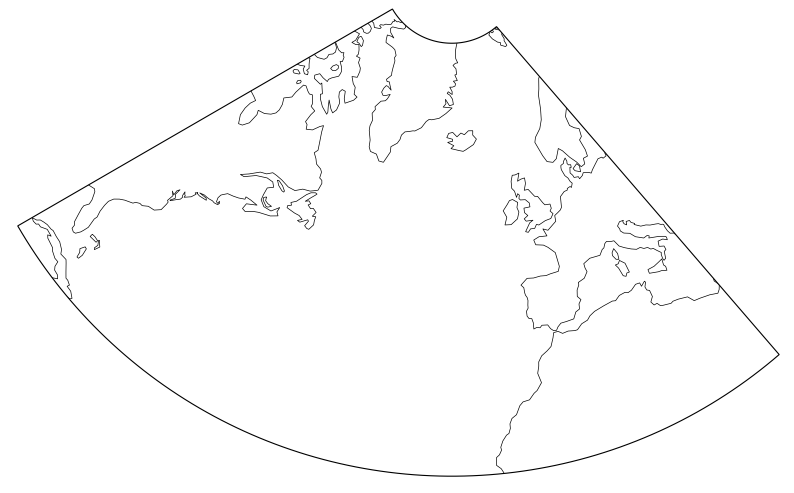

In [10]:
# Plot the data:

# Generate figure and projection using Cartopy
plt.figure(figsize=(10, 7))
proj = ccrs.LambertConformal(central_longitude=-22.5,
                             standard_parallels=(45, 89))
# Set axis projection
ax = plt.axes(projection=proj)
ax.coastlines(linewidth=0.5)

# Make a custom boundary using convenience function
gv.set_map_boundary(ax, [-85, 20], [20, 80], south_pad=1)


plt.show();

In [ ]:
# Plot data and create colorbar
wind = masked.plot.contourf(ax=ax,
                            cmap=newcmp,
                            transform=ccrs.PlateCarree(),
                            add_colorbar=False,
                            levels=24)
cbar = plt.colorbar(wind,
                    ax=ax,
                    orientation='horizontal',
                    drawedges=True,
                    ticks=np.arange(-40, 44, 4),
                    pad=0.1,
                    aspect=18)
cbar.ax.tick_params(length=0)  # remove tick marks but leave in labels

# Use geocat.viz.util convenience function to add left and right titles
gv.set_titles_and_labels(ax,
                         lefttitle=V.long_name,
                         lefttitlefontsize=16,
                         righttitle=V.units,
                         righttitlefontsize=16)